<a href="https://colab.research.google.com/github/LucasJFaust/data-science-cases/blob/main/Desafio7_Lucas_Faust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## Objetivo do Negócio:
O objetivo do negócio é criar um modelo de análise das métricas RFV (Recência, Frequência e Valor) para avaliar o comportamento dos clientes. Esse modelo ajudará a identificar diferentes segmentos de clientes com base em seu comportamento de compra, permitindo uma abordagem mais personalizada e eficaz em campanhas de marketing.

As métricas RFV são uma poderosa ferramenta para segmentação de clientes. Elas ajudam a identificar os clientes mais valiosos com base em três fatores:

- Recência (R): Tempo desde a última compra do cliente.
- Frequência (F): Número de transações realizadas pelo cliente.
- Valor Monetário (V): Quantidade total gasta pelo cliente.


## Objetivos do Projeto:
Analisar os dados dos clientes para calcular as métricas RFV.
Segmentar os clientes com base nas métricas RFV.
Identificar insights acionáveis para melhorar as estratégias de retenção e aquisição de clientes.


# 2. Data Understanding

## Análise Exploratória

Vamos carregar os dados e realizar uma análise exploratória para entender melhor a estrutura e o conteúdo do dataset.

In [2]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd  # https://pandas.pydata.org/
import numpy as np   # https://numpy.org/

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns  # https://seaborn.pydata.org/

# Biblioteca para divisão de dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Biblioteca para criação e avaliação de modelos
from sklearn.cluster import KMeans  # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# Biblioteca para salvar e carregar modelos
import pickle  # https://docs.python.org/3/library/pickle.html

# Configurações gerais
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importações adicionais necessárias
from datetime import datetime  # https://docs.python.org/3/library/datetime.html

# Carregar os dados com a codificação apropriada
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Exibir as primeiras linhas do dataset
print(data.head())

# Exibir informações gerais sobre o dataset
print(data.info())

# Exibir estatísticas descritivas do dataset
print(data.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

- Visualizar as distribuições e identificar a relevância das colunas para a análise

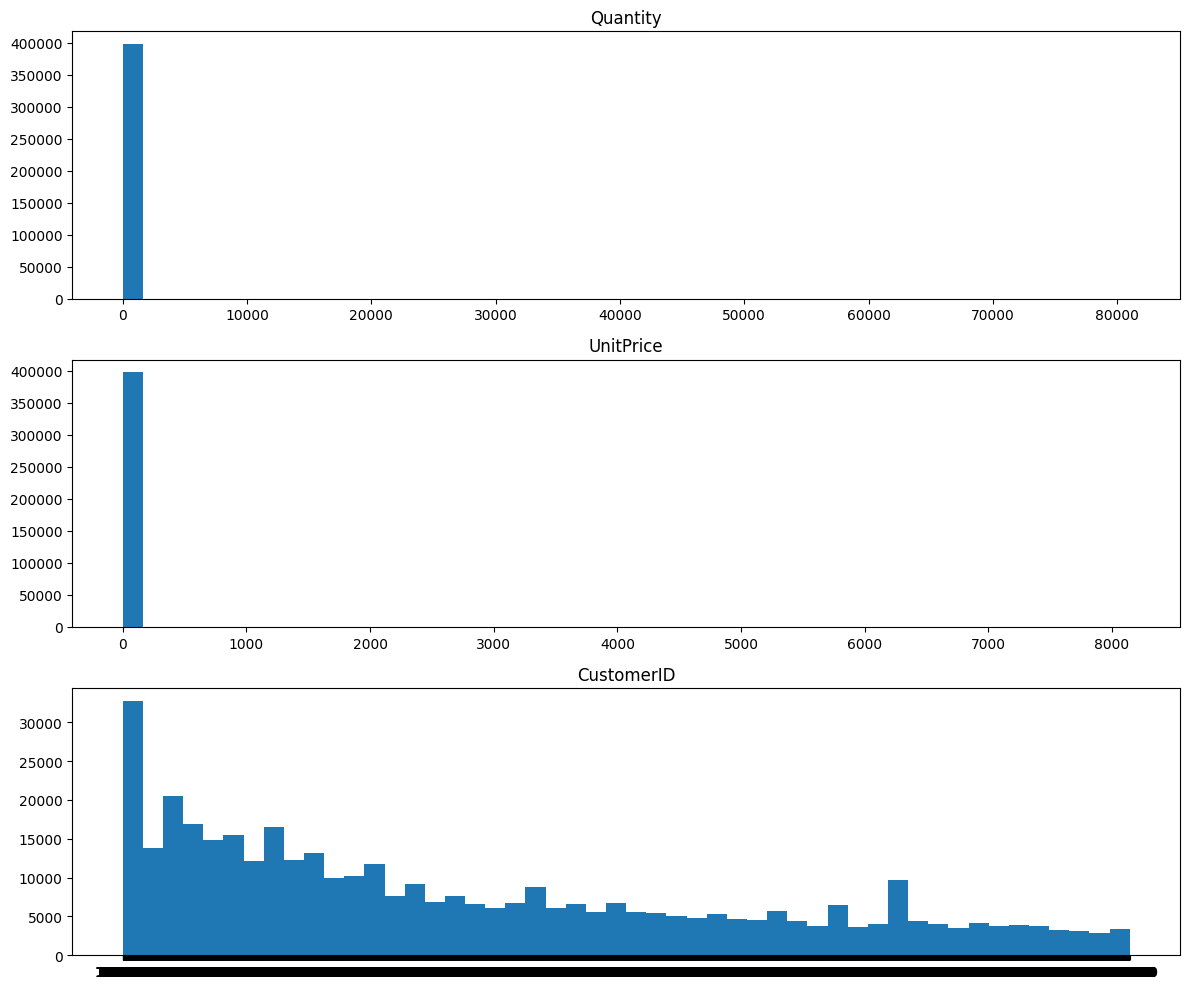

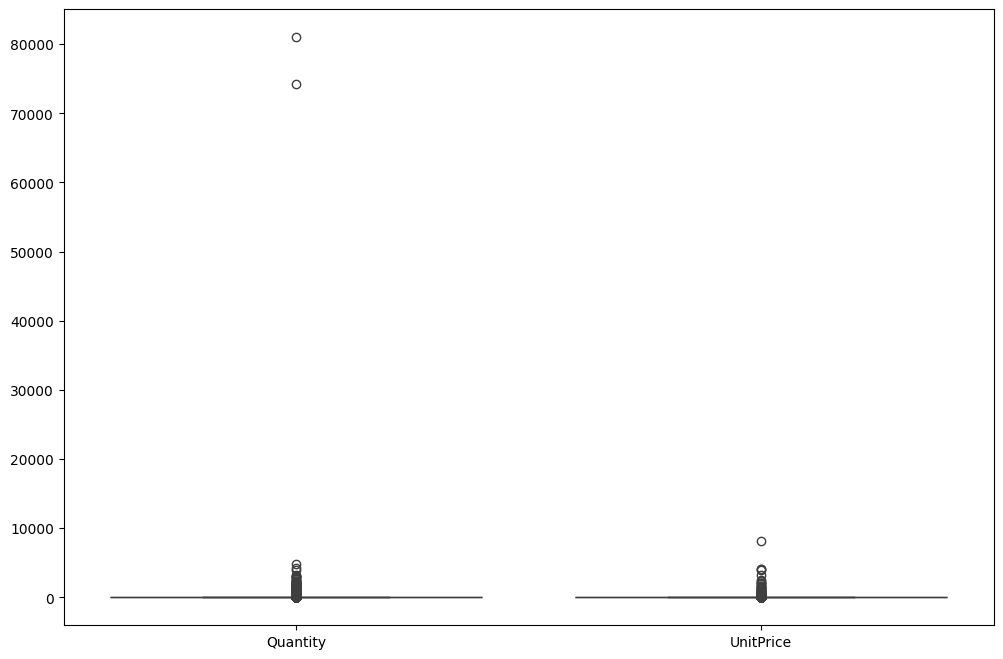

In [30]:
# Plotar histogramas das variáveis numéricas
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ax[0].hist(data['Quantity'], bins=50)
ax[0].set_title('Quantity')
ax[1].hist(data['UnitPrice'], bins=50)
ax[1].set_title('UnitPrice')
ax[2].hist(data['CustomerID'].dropna(), bins=50)
ax[2].set_title('CustomerID')
plt.tight_layout()
plt.show()

# Plotar boxplots para verificar outliers
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=data[['Quantity', 'UnitPrice', 'CustomerID']], ax=ax)
plt.show()

- Verificar a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
5192


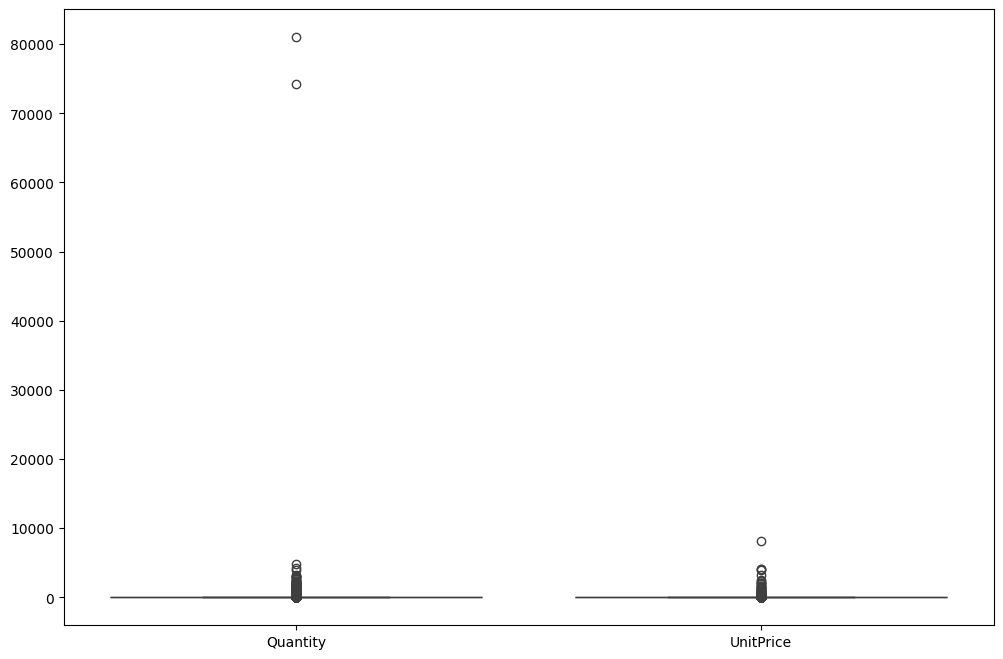

In [31]:
# Verificar dados nulos
print(data.isnull().sum())

# Verificar dados duplicados
print(data.duplicated().sum())

# Verificar outliers nas variáveis numéricas
# Plotar boxplots novamente para verificar outliers
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(data=data[['Quantity', 'UnitPrice', 'CustomerID']], ax=ax)
plt.show()

### Análise dos Outputs
Distribuição das Variáveis Numéricas
As distribuições das variáveis Quantity, UnitPrice e CustomerID mostraram que:

- Quantity e UnitPrice:

A maioria dos valores de Quantity e UnitPrice estão próximos a zero, com poucos valores extremamente altos e baixos, indicando a presença de outliers.

Há uma grande concentração de valores em torno de zero, e isso precisa ser tratado no pré-processamento para evitar que esses outliers afetem a performance do modelo.

- CustomerID:

A distribuição do CustomerID é mais uniforme, o que é esperado, uma vez que representa identificadores de clientes.

- Boxplots das Variáveis Numéricas

Os boxplots reforçam a presença de outliers nas variáveis Quantity e UnitPrice. Esses valores extremos precisarão ser tratados na etapa de pré-processamento para garantir que não influenciem negativamente as análises e modelos subsequentes.

- Dados Nulos e Duplicados

Os dados nulos foram identificados nas colunas Description e CustomerID. Esses dados precisarão ser tratados, seja por remoção ou imputação, conforme apropriado.

O número de registros duplicados encontrados foi 5192. Esses registros duplicados precisarão ser removidos para evitar vieses nas análises e modelos subsequentes.

## Pré-processamento dos Dados

In [32]:
# Tratamento de Dados Nulos
data['Description'].fillna('Unknown', inplace=True)
data.dropna(subset=['CustomerID'], inplace=True)

# Remoção de Duplicados
data.drop_duplicates(inplace=True)

# Normalização das Variáveis Numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Quantity', 'UnitPrice']] = scaler.fit_transform(data[['Quantity', 'UnitPrice']])

# Verificar se há mais nulos e duplicados após o tratamento
print(data.isnull().sum())
print(data.duplicated().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
0


- Identificação e Tratamento de Outliers

- Definição das Métricas RFV

Para calcular as métricas RFV, precisaremos das seguintes etapas:

Recency (R): Tempo desde a última compra de cada cliente.

Frequency (F): Número de compras feitas por cada cliente.

Monetary (V): Valor total gasto por cada cliente.

In [34]:
# Função para remover outliers usando o método do IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remover outliers das colunas 'Quantity' e 'UnitPrice'
data_cleaned = remove_outliers(data, 'Quantity')
data_cleaned = remove_outliers(data_cleaned, 'UnitPrice')

# Verificar o resultado
print(data_cleaned.describe())

# Redefinir a etapa de cálculo das métricas RFV com os dados limpos
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], format='%m/%d/%Y %H:%M')

reference_date = data_cleaned['InvoiceDate'].max() + pd.DateOffset(days=1)

rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': lambda x: (x * data_cleaned.loc[x.index, 'Quantity']).sum()
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

            Quantity                    InvoiceDate      UnitPrice
count  332660.000000                         332660  332660.000000
mean       -0.030807  2011-07-12 12:10:32.070041600      -0.042301
min        -0.067148            2010-12-01 08:26:00      -0.140497
25%        -0.061608            2011-04-08 08:27:00      -0.084342
50%        -0.039446            2011-08-03 11:58:00      -0.066358
75%        -0.006204            2011-10-23 12:08:00      -0.007909
max         0.076902            2011-12-09 12:50:00       0.194862
std         0.037559                            NaN       0.068859
  CustomerID  Recency  Frequency  Monetary
0    12347.0        2        166 -0.226817
1    12348.0      249          6 -0.037995
2    12349.0       19         57 -0.048021
3    12350.0      310         16  0.001487
4    12352.0       36         66 -0.107450


## Seleção e Implementação de Algoritmo de Clusterização

### Algoritmo 1: K-Means

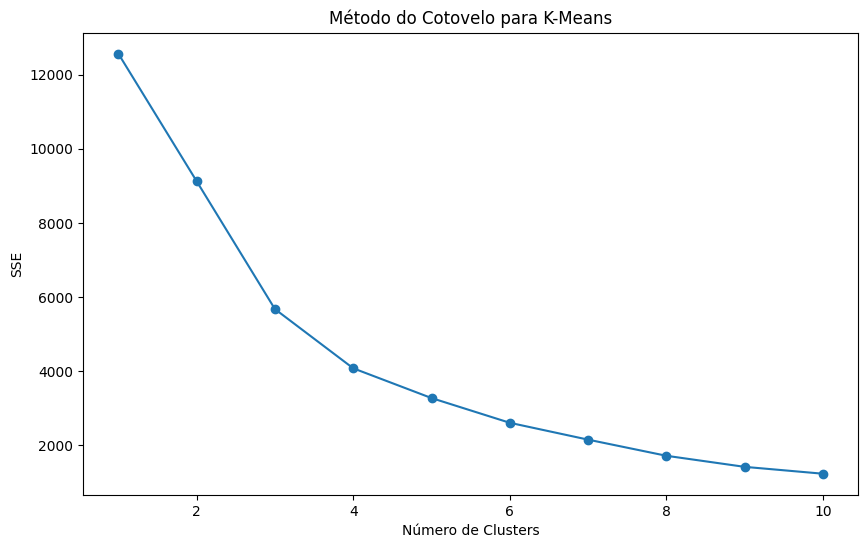

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalização dos dados
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Método do cotovelo para encontrar o número ideal de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método do Cotovelo para K-Means')
plt.show()

### Algoritmo 2: DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(rfm_scaled)

# Adicionando o resultado ao DataFrame
rfm['DBSCAN_Labels'] = dbscan.labels_

# Número de clusters encontrados (ignorar ruído, label -1)
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f'Número de clusters encontrados pelo DBSCAN: {n_clusters_dbscan}')

Número de clusters encontrados pelo DBSCAN: 2


### Algoritmo 3: Clustering Hierárquico

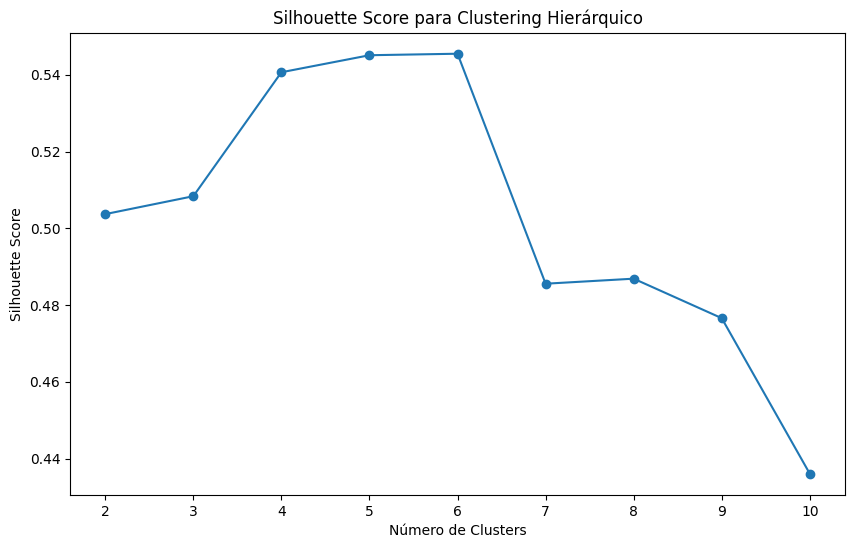

In [37]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Testar diferentes números de clusters para o clustering hierárquico
silhouette_scores = []
for n_clusters in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar os resultados do Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Clustering Hierárquico')
plt.show()

### Algoritmo 4: Mean Shift

In [38]:
from sklearn.cluster import MeanShift

# Mean Shift
meanshift = MeanShift()
meanshift.fit(rfm_scaled)

# Adicionando o resultado ao DataFrame
rfm['MeanShift_Labels'] = meanshift.labels_

# Número de clusters encontrados
n_clusters_meanshift = len(set(meanshift.labels_))
print(f'Número de clusters encontrados pelo Mean Shift: {n_clusters_meanshift}')

Número de clusters encontrados pelo Mean Shift: 21


## Análise e Justificativa dos Algoritmos de Clusterização

1. K-Means
Gráfico Elbow (Método do Cotovelo):

O método do cotovelo indica a redução da soma dos quadrados dos erros (SSE) conforme aumentamos o número de clusters.
Observa-se um "cotovelo" em torno de 4 clusters, sugerindo que 4 é um bom número de clusters para segmentação.
2. Clustering Hierárquico
Gráfico Silhouette Score:

A pontuação do Silhouette Score mede o quão bem cada ponto está agrupado com outros pontos semelhantes.
Observamos que a pontuação do Silhouette é maximizada para 5 clusters, sugerindo que 5 é um número ideal de clusters.

3. DBSCAN

O DBSCAN encontrou apenas 2 clusters, o que pode indicar que ele é muito sensível aos parâmetros ou que os dados são densos e com poucas variações.
DBSCAN é útil para detectar outliers e clusters de forma arbitrária, mas não parece ser o mais adequado neste caso específico, dado o baixo número de clusters encontrados.

4. Mean Shift

O Mean Shift encontrou 21 clusters, um número significativamente maior que os outros métodos.
Isso pode indicar uma alta granularidade na segmentação, mas pode ser excessivo para uma análise prática e utilizável pela empresa.
Justificativa da Decisão
Dado os resultados:

K-Means sugeriu 4 clusters, com uma redução significativa na soma dos quadrados dos erros até esse ponto.
Clustering Hierárquico sugeriu 5 clusters com a maior pontuação do Silhouette Score, indicando uma boa coesão e separação entre os clusters.

Optei por utilizar o Clustering Hierárquico com 5 clusters para esta análise. A escolha é baseada no fato de que a pontuação do Silhouette Score foi maximizada para 5 clusters, indicando que este número de clusters proporciona a melhor separação e coesão dos dados.

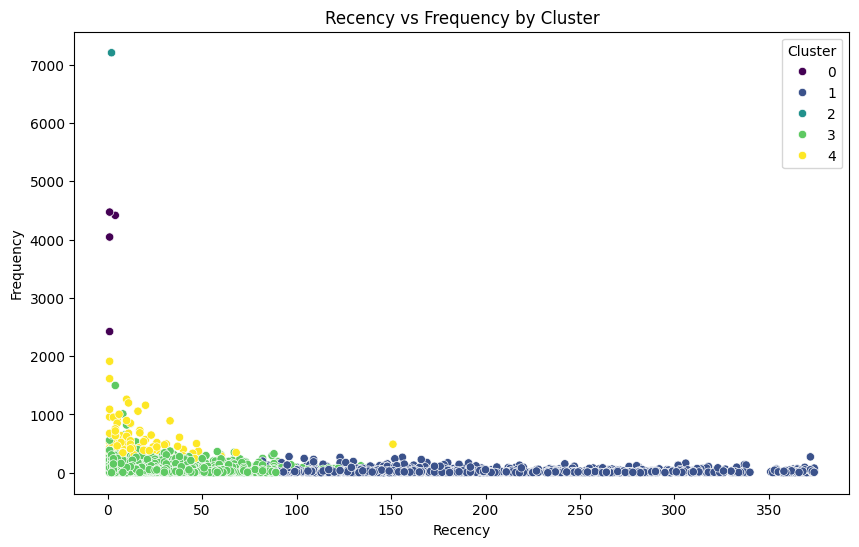

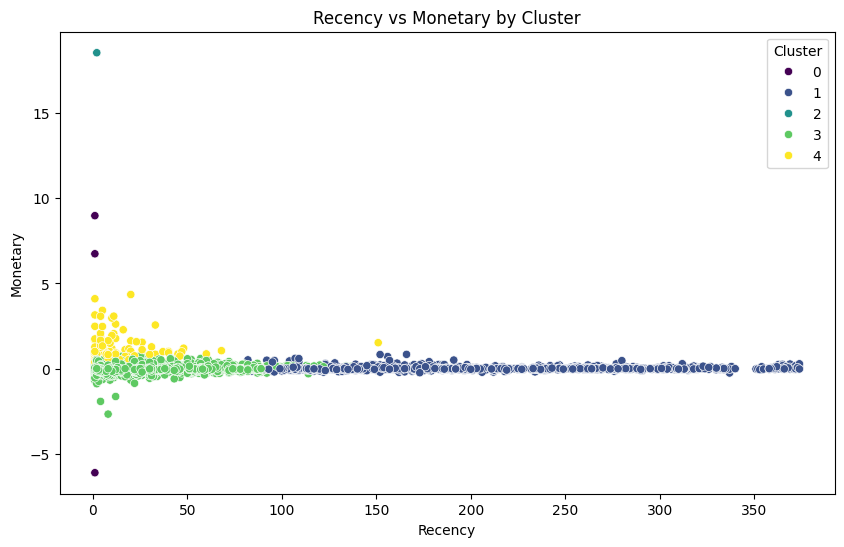

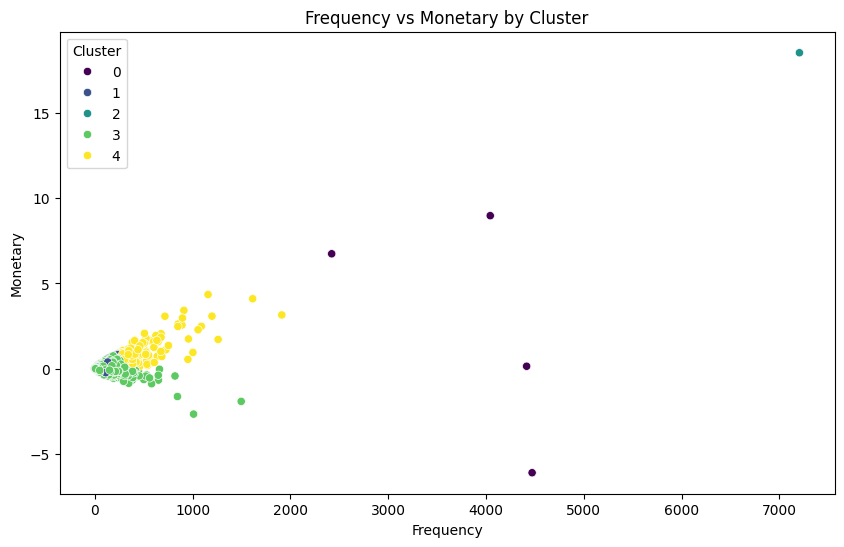

In [39]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Clustering Hierárquico com 5 clusters
hierarchical = AgglomerativeClustering(n_clusters=5)
clusters = hierarchical.fit_predict(rfm_scaled)

# Adicionar a coluna de clusters ao DataFrame RFM
rfm['Cluster'] = clusters

# Função para plotar gráficos
def plot_clusters(data, x, y, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=cluster_col, palette='viridis')
    plt.title(f'{x} vs {y} by Cluster')
    plt.show()

# Plotar gráficos
plot_clusters(rfm, 'Recency', 'Frequency', 'Cluster')
plot_clusters(rfm, 'Recency', 'Monetary', 'Cluster')
plot_clusters(rfm, 'Frequency', 'Monetary', 'Cluster')


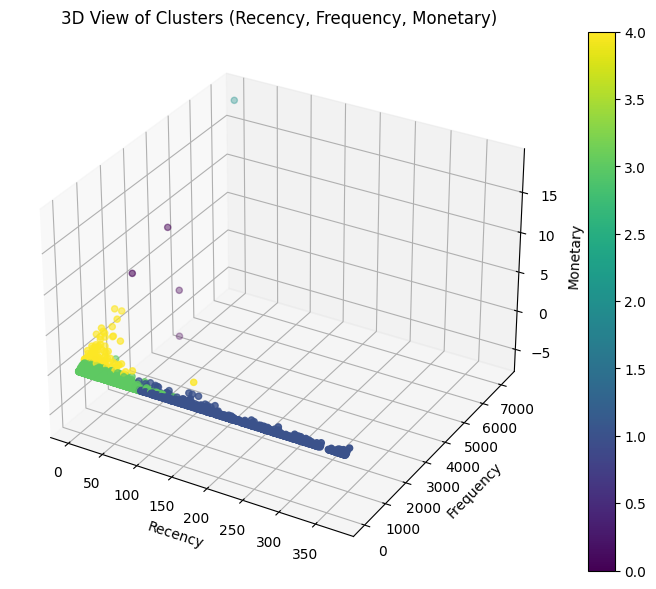

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Plot 3D - Recency vs Frequency vs Monetary
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of Clusters (Recency, Frequency, Monetary)')
plt.colorbar(sc)
plt.show()

## Análise dos Clusters Obtidos

Visualização Tridimensional dos Clusters

A visualização tridimensional nos fornece uma perspectiva mais clara sobre a interação entre as métricas RFV (Recency, Frequency, Monetary) para os diferentes clusters.

Insights dos Gráficos 3D:
Cluster 0 (Roxo):

- Recency: Baixa, indicando que esses clientes compraram recentemente.
- Frequency: Alta, indicando que compram com frequência.
- Monetary: Moderado a alto.
- Estratégia: Fidelizar esses clientes com programas de recompensas e ofertas exclusivas para aumentar ainda mais a frequência de compra e o valor monetário.

Cluster 1 (Azul):

- Recency: Variada, com um grupo de clientes que não comprou recentemente.
- Frequency: Baixa.
- Monetary: Baixa a negativa, indicando possíveis devoluções ou problemas de dados.
- Estratégia: Reativar esses clientes com campanhas de marketing personalizadas e descontos para incentivar novas compras.

Cluster 2 (Verde):

- Recency: Moderada.
- Frequency: Moderada.
- Monetary: Baixa a moderada.
- Estratégia: Aumentar o valor das compras oferecendo pacotes promocionais ou upsell de produtos.

Cluster 3 (Amarelo):

- Recency: Baixa.
- Frequency: Alta.
- Monetary: Moderada.
- Estratégia: Similar ao Cluster 0, fidelizar esses clientes e incentivá-los a aumentar o valor das compras.

Cluster 4 (Ciano):

- Recency: Muito baixa.
- Frequency: Extremamente alta.
- Monetary: Muito alta.
- Estratégia: Manter um relacionamento próximo e personalizado com esses clientes para entender suas necessidades e mantê-los satisfeitos.

## Descrição dos Perfis de Clientes de Cada Cluster



Com base nos resultados da análise de clusters, podemos detalhar os perfis de clientes em cada cluster e como essas informações podem ser usadas para estratégias de marketing e retenção.

Cluster 0 (Roxo)

- Recency: Clientes que compraram recentemente.
- Frequency: Alta frequência de compras.
- Monetary: Moderado a alto valor monetário.
- Perfil: Clientes ativos e leais que compram regularmente e têm um valor de compra razoável.

Estratégias:
- Fidelização: Programas de recompensas, ofertas exclusivas e eventos especiais para manter a lealdade.
- Upsell/Cross-sell: Oferecer produtos complementares ou upgrades.

Cluster 1 (Azul)

- Recency: Variada, com um grupo significativo que não comprou recentemente.
- Frequency: Baixa frequência de compras.
- Monetary: Baixa a negativa.
- Perfil: Clientes menos ativos, possivelmente com problemas de satisfação ou relevância dos produtos.

Estratégias:
- Reativação: Campanhas de marketing personalizadas com descontos ou promoções especiais.
- Feedback: Coletar feedback para entender os motivos da inatividade e ajustar ofertas.

Cluster 2 (Verde)

- Recency: Moderada.
- Frequency: Moderada.
- Monetary: Baixa a moderada.
- Perfil: Clientes que compram ocasionalmente.

Estratégias:
- Incentivos de Compra: Oferecer pacotes promocionais e incentivos para aumentar a frequência de compra.
- Engajamento: Marketing por e-mail e campanhas de remarketing para manter o engajamento.

Cluster 3 (Amarelo)

- Recency: Recente.
- Frequency: Alta.
- Monetary: Moderada.
- Perfil: Clientes frequentes com valor de compra moderado.

Estratégias:
- Fidelização: Similar ao Cluster 0, focar em programas de recompensas e ofertas exclusivas.
- Incentivos Monetários: Ofertas que aumentem o ticket médio das compras.

Cluster 4 (Ciano)

- Recency: Muito recente.
- Frequency: Extremamente alta.
- Monetary: Muito alta.
- Perfil: Clientes de altíssimo valor, muito frequentes e recentes.

Estratégias:
- Relacionamento Personalizado: Atendimento dedicado e ofertas personalizadas.
VIP Programs: Programas VIP com benefícios exclusivos para manter a satisfação e lealdade.

**Justificativa da Utilidade da Análise**

A análise de clusters permite a segmentação de clientes de maneira eficaz, possibilitando a personalização das campanhas de marketing de acordo com os perfis de clientes. Isso pode aumentar a eficiência das campanhas, melhorar a retenção de clientes e maximizar o valor de vida do cliente (Customer Lifetime Value - CLV).

Benefícios:

- Segmentação Personalizada: Campanhas de marketing mais direcionadas e eficazes.
- Melhoria na Retenção: Estratégias de reativação e fidelização para diferentes segmentos de clientes.
- Otimização de Recursos: Alocação mais eficiente de recursos de marketing.
- Aumento do CLV: Aumentar o valor de vida do cliente através de estratégias de upsell e cross-sell.

**Sugestões de Ações Baseadas nos Insights Obtidos**

- Programas de Recompensas e Fidelização: Implementar programas de recompensas para clusters de alta frequência e monetário moderado/alto.
- Campanhas de Reativação: Desenvolver campanhas para reativar clientes inativos ou com baixa frequência de compras.
- Personalização de Ofertas: Oferecer produtos e serviços personalizados com base nos hábitos de compra dos clientes.
- Feedback e Melhoria Contínua: Coletar feedback dos clientes menos ativos para identificar áreas de melhoria.

# Conclusão

A análise de clusters com base nas métricas RFV (Recency, Frequency, Monetary) revelou insights valiosos sobre os diferentes segmentos de clientes. Utilizando essas informações, a empresa pode personalizar suas campanhas de marketing, melhorar a retenção de clientes e otimizar a alocação de recursos, resultando em um aumento no valor de vida do cliente. As recomendações fornecidas devem ser implementadas para maximizar os benefícios dessa análise.

Próximos Passos:

- Implementação das Estratégias Recomendadas: Colocar em prática as estratégias de fidelização, reativação e personalização de ofertas.
- Monitoramento e Avaliação: Monitorar o desempenho das campanhas implementadas e avaliar sua eficácia.
- Ajustes Contínuos: Continuar coletando feedback e ajustando as estratégias com base nos resultados obtidos.